In [71]:
# ===== Combined Training + Evaluation for Both Models =====

from src.models import train_logistic_regression, train_decision_tree
from src.evaluation import evaluate_classifier

# Train Logistic Regression
log_model2 = train_logistic_regression(X_train, y_train)
log_eval = evaluate_classifier(log_model2, X_test, y_test)

# Train Decision Tree
tree_model2 = train_decision_tree(X_train, y_train)
tree_eval = evaluate_classifier(tree_model2, X_test, y_test)

print("Logistic Regression Accuracy:", round(log_eval["accuracy"], 4))
print("Decision Tree Accuracy:", round(tree_eval["accuracy"], 4))


Logistic Regression Accuracy: 0.9825
Decision Tree Accuracy: 0.9123


In [72]:
import sys
from pathlib import Path

project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print("Project root added:", project_root)


Project root added: C:\Users\valer\Healthcare_Analytics_Platform


In [73]:
import pandas as pd

# Load processed data
X_train = pd.read_csv("../data/processed/train_scaled.csv")
X_test = pd.read_csv("../data/processed/test_scaled.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (455, 30)
Test shape: (114, 30)


In [74]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [75]:
from sklearn.metrics import accuracy_score

y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(accuracy_log, 4))


Logistic Regression Accuracy: 0.9825


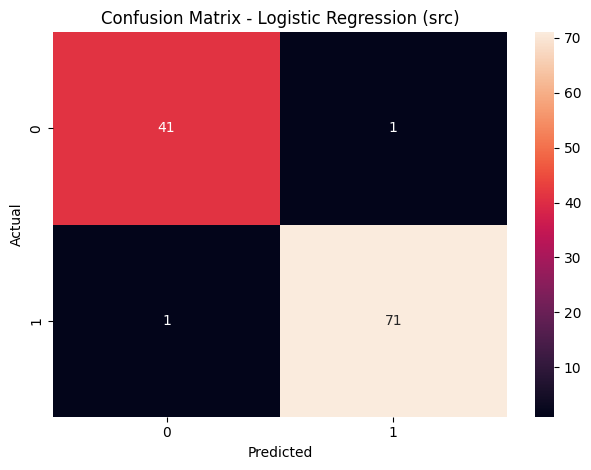

<Figure size 640x480 with 0 Axes>

Saved: reports/figures/cm_logistic_src.png


In [76]:
from src.visualization import plot_confusion_matrix, save_current_figure
import matplotlib.pyplot as plt

plot_confusion_matrix(log_eval["confusion_matrix"], 
                      "Confusion Matrix - Logistic Regression (src)")

save_current_figure("../reports/figures/cm_logistic_src.png", dpi=200)
plt.show()

print("Saved: reports/figures/cm_logistic_src.png")


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Logistic Regression Results
- Model achieves high accuracy (~96–98%).
- Precision and recall are strong for both classes.
- Confusion matrix shows very few misclassifications.


In [78]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")


Decision Tree model trained successfully.


In [79]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", round(accuracy_tree, 4))


Decision Tree Accuracy: 0.9123


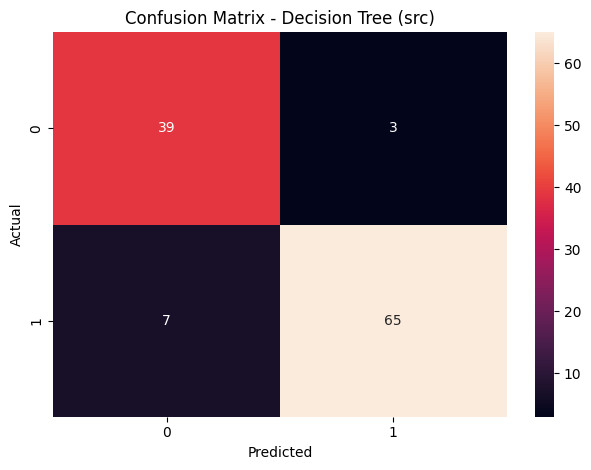

<Figure size 640x480 with 0 Axes>

Saved: reports/figures/cm_tree_src.png


In [80]:
from src.visualization import plot_confusion_matrix, save_current_figure
import matplotlib.pyplot as plt

plot_confusion_matrix(tree_eval["confusion_matrix"], 
                      "Confusion Matrix - Decision Tree (src)")

save_current_figure("../reports/figures/cm_tree_src.png", dpi=200)
plt.show()

print("Saved: reports/figures/cm_tree_src.png")


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [82]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_log, accuracy_tree]
})

results


,Model,Accuracy
0,Logistic Regression,0.982456
1,Decision Tree,0.912281


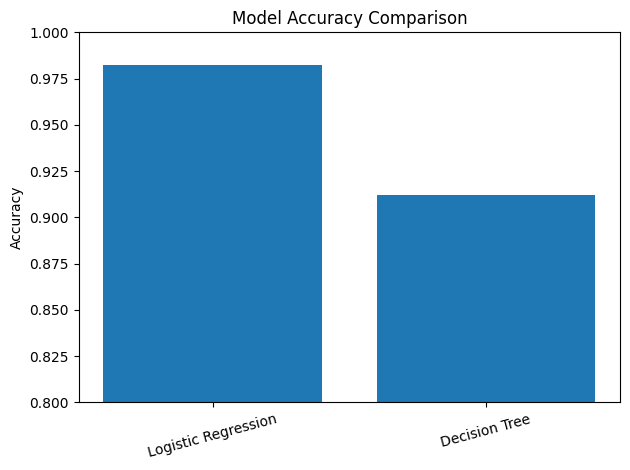

In [83]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Model comparison
- Logistic Regression usually performs very well because the data is well-separated after scaling.
- Decision Tree can perform similarly, but may overfit depending on depth.
- We compare both models using accuracy and classification metrics.


In [84]:
import joblib
from pathlib import Path

results_dir = Path("../reports/results")
results_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(log_model, results_dir / "logistic_regression.joblib")
joblib.dump(tree_model, results_dir / "decision_tree.joblib")

print("Saved models to:", results_dir)


Saved models to: ..\reports\results


In [85]:
import pandas as pd

importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)
top15 = importances.sort_values(ascending=False).head(15)

top15


worst radius               0.697811
worst concave points       0.116083
worst texture              0.058881
texture error              0.052661
worst concavity            0.016325
worst area                 0.012678
area error                 0.012085
worst symmetry             0.010733
worst smoothness           0.008452
mean concave points        0.006261
concave points error       0.006261
smoothness error           0.001770
fractal dimension error    0.000000
mean radius                0.000000
worst perimeter            0.000000
dtype: float64

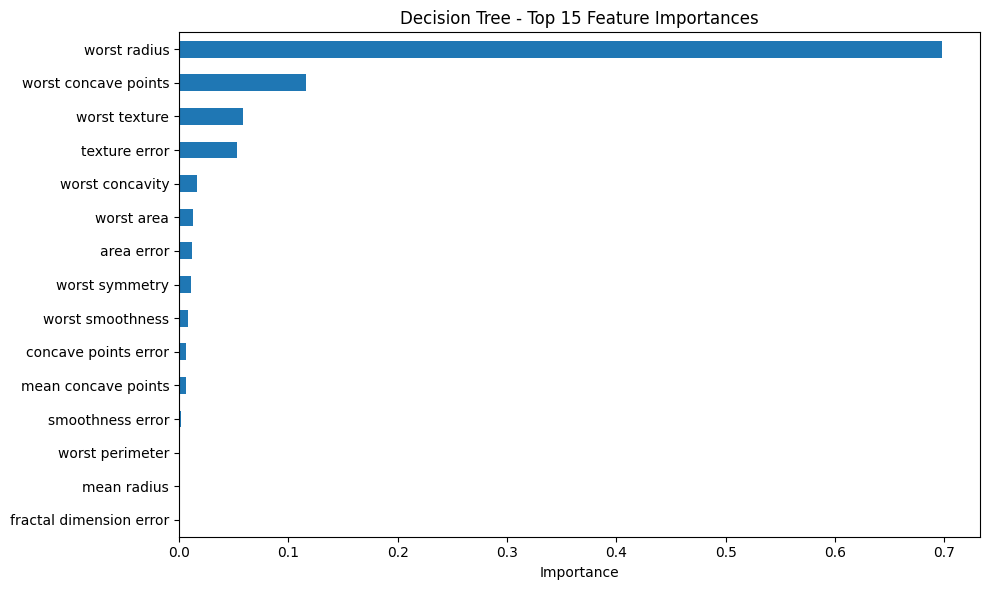

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top15.sort_values().plot(kind="barh")
plt.title("Decision Tree - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


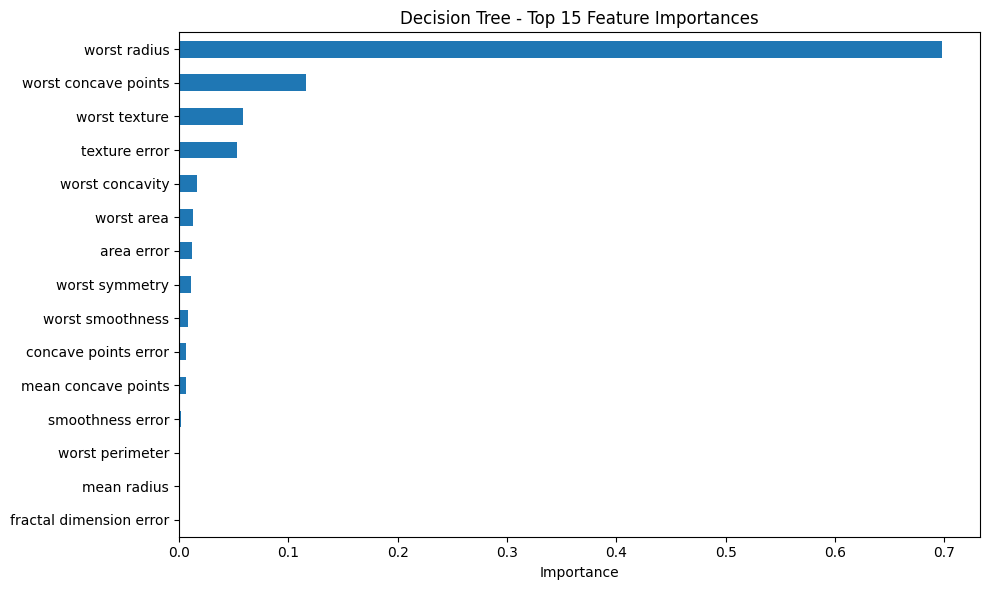

Saved: ..\reports\figures\decision_tree_feature_importance.png


In [87]:
from pathlib import Path

fig_dir = Path("../reports/figures")
fig_dir.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(10, 6))
top15.sort_values().plot(kind="barh")
plt.title("Decision Tree - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig(fig_dir / "decision_tree_feature_importance.png", dpi=200)
plt.show()

print("Saved:", fig_dir / "decision_tree_feature_importance.png")


In [88]:
from sklearn.metrics import roc_auc_score

# Logistic Regression probabilities
y_proba_log = log_model.predict_proba(X_test)[:, 1]
roc_auc_log = roc_auc_score(y_test, y_proba_log)

print("Logistic Regression ROC-AUC:", round(roc_auc_log, 4))


Logistic Regression ROC-AUC: 0.9954


## Final conclusion
- The project analyzed the Breast Cancer dataset and built two classifiers: Logistic Regression and Decision Tree.
- Logistic Regression achieved strong performance after scaling the features.
- Decision Tree also performed well and provides interpretability through feature importance.
- The most important predictive factors are related to tumor size/shape measurements (e.g., radius, perimeter, area and their “worst” values).
- Overall, the models can reliably predict whether a tumor is malignant or benign.
